In [1]:
from mdagent import MDAgent
import os 

In [2]:
import sys
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(parent_dir)
from robustness_prompts import get_prompt

prompt_10_descriptive = get_prompt("descriptive", 10)
prompt_10_natural = get_prompt("natural", 10)

prompt_10_descriptive, prompt_10_natural

('Complete all of the following tasks: 1. Download the PDB file 1LYZ. 2. Report the secondary structure assignments of the downloaded PDB structure. 3. Find any known binding or active sites. 4. Simulate for 1ps at 300 K. 5. Compute the RMSD. 6. Compute the radius of gyration over time. 7. Compute the SASA (solvent accessible surface area). 8. Simulate for 1ps at 400K. 9. Compute the RMSD of the 400K simulation. 10. Compute the radius of gyration over time for the 400K simulation.',
 'Simulate 1LYZ for 1ps at 300 K and for 1ps at 400K. Report the secondary structure assignments of the downloaded PDB structure and any known binding or active sites. Compute RMSD and radius of gyration of both simulations. Compute SASA for the 300K simulation.')

In [3]:
llm_model = "accounts/fireworks/models/llama-v3p1-405b-instruct"
tools = "all"

In [4]:
agent_1 = MDAgent(agent_type="Structured", model=llm_model, top_k_tools=tools, use_memory=False)
agent_1.run(prompt_10_descriptive)

Thought: First, I need to download the PDB file 1LYZ.
Action:
```
{
  "action": "PDBFileDownloader",
  "action_input": "1LYZ"
}
```
PDB file found with this ID: 1LYZ
Thought: Next, I need to report the secondary structure assignments of the downloaded PDB structure.
Action:
```
{
  "action": "ComputeDSSP",
  "action_input": {
    "traj_file": "1LYZ_110020",
    "top_file": "1LYZ_110020",
    "target_frames": "all"
  }
}
```Thought: Now, I need to find any known binding or active sites.
Action:
```
{
  "action": "GetBindingSites",
  "action_input": {
    "query": "1LYZ",
    "primary_accession": ""
  }
}
```
Thought: Next, I need to simulate for 1ps at 300 K.
Action:
```
{
  "action": "SetUpandRunFunction",
  "action_input": {
    "pdb_id": "1LYZ_110020",
    "forcefield_files": ["amber99sbildn.xml"],
    "save": true,
    "system_params": {
      "nonbondedMethod": "NoCutoff",
      "constraints": "None",
      "rigidWater": false
    },
    "integrator_params": {
      "integrator_typ

System built successfully
<openmm.openmm.System; proxy of <Swig Object of type 'OpenMM::System *' at 0x7efaa7aa8840> >
Setting up integrator...
Creating simulation...
simulation set!
Performing energy minimization...
Minimization complete!
Initial Positions saved to initial_positions.pdb
Equilibrating...
Simulating...
Done!
Standalone simulation script written to /gpfs/fs2/scratch/qcampbe2/repos/md-agent/ckpt/ckpt_131/simulations/NVT_1LYZ_110031_20250124_110035.py
['TOP_sim0_110035_1LYZ_110031_20250124_110036.pdb', 'prompt7.ipynb', 'prompt1.ipynb', 'prompt3.ipynb', '.ipynb_checkpoints', 'prompt5-Copy1.ipynb', 'prompt10.ipynb', 'prompt9.ipynb', 'prompt2.ipynb', 'prompt8.ipynb', 'prompt6.ipynb', 'prompt4.ipynb', 'LOG_sim0_110035_1LYZ_110031_20250124_110036.txt', 'TRAJ_sim0_110035_1LYZ_110031_20250124_110036.dcd', 'prompt5.ipynb']
Thought: Now that the simulation at 300 K has been completed, I need to compute the RMSD of the simulation.
Action:
```
{
  "action": "ComputeRMSD",
  "action_i

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

<Figure size 640x480 with 0 Axes>

In [5]:
registry_1 = agent_1.path_registry
print(registry_1.list_path_names_and_descriptions().replace(",", "\n"))

Files found in registry: 1LYZ_110020: PDB file downloaded from RSCB
 PDBFile ID: 1LYZ_110020
 rec0_110022: dssp values for trajectory with id: 1LYZ_110020
 1LYZ_110031: Cleaned File:  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_110035: Initial positions for simulation sim0_110035
 sim0_110035: Basic Simulation of Protein 1LYZ_110031
 rec0_110036: Simulation trajectory for protein 1LYZ_110031 and simulation sim0_110035
 rec1_110036: Simulation state log for protein 1LYZ_110031 and simulation sim0_110035
 rec2_110036: Simulation pdb frames for protein 1LYZ_110031 and simulation sim0_110035
 rmsd_1LYZ: RMSD for 1LYZ
 fig0_110046: RMSD plot for 1LYZ
 rgy_rec0_110036: Radii of gyration per frame for rec0_110036
 fig0_110048: Plot of radii of gyration over time for rec0_110036
 sasa_1LYZ: Total SASA values for 1LYZ
 fig0_110051: Plot of SASA over time for 1LYZ
 top_sim0_110055: Initial positions for simulation si

In [2]:
agent_1 = MDAgent(ckpt_dir="ckpt_131")
registry_1 = agent_1.path_registry

In [4]:
# make sure pdb was downloaded
assert os.path.exists(registry_1.get_mapped_path("1LYZ_110020"))

In [5]:
# make sure dssp was computed correctly
from mdagent.tools.base_tools import ComputeDSSP

dssp = ComputeDSSP(registry_1)
dssp._run(traj_file= "1LYZ_110020", target_frames="first")

"{'residues in helix': 50, 'residues in strand': 14, 'residues in coil': 65, 'residues not assigned, not a protein residue': 101}"

In [6]:
# make sure the sites were found
from mdagent.tools.base_tools import GetBindingSites

get_all_known_sites = GetBindingSites()
get_all_known_sites._run(query="1LYZ", primary_accession="")

'[]'

In [7]:
# make sure trajectory and topology exist (sim1)
traj_path_1_1 = registry_1.get_mapped_path("rec0_110036")
top_path_1_1 = registry_1.get_mapped_path("top_sim0_110035")

assert os.path.exists(traj_path_1_1)
assert os.path.exists(top_path_1_1)

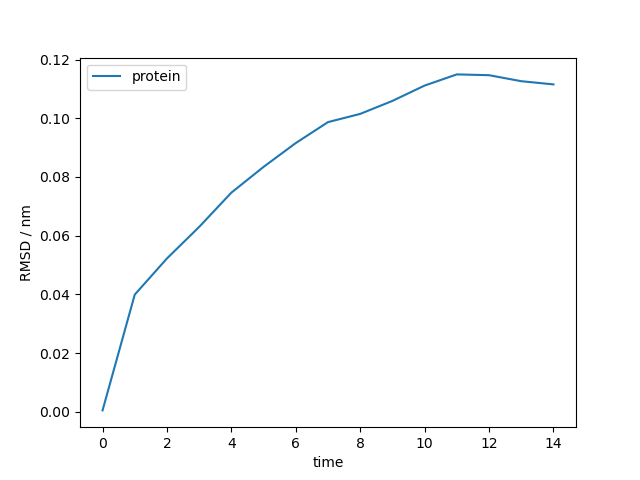

In [8]:
# make sure rmsd plot was generated (sim1)
from IPython.display import Image
Image(filename=registry_1.get_mapped_path('fig0_110046'))

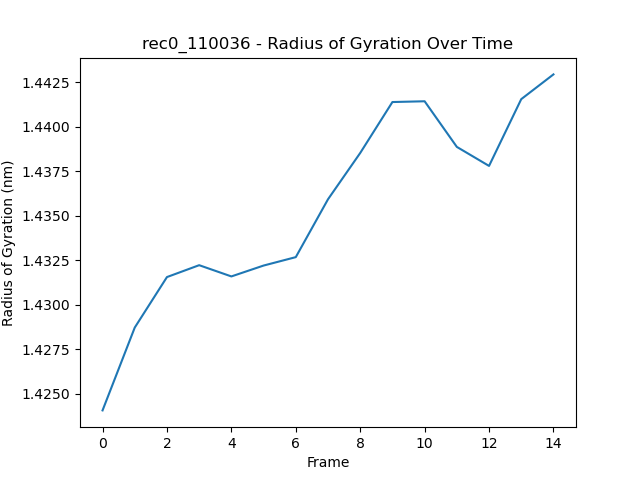

In [9]:
# make sure rgy plot was generated (sim1)
from IPython.display import Image
Image(filename=registry_1.get_mapped_path('fig0_110048'))

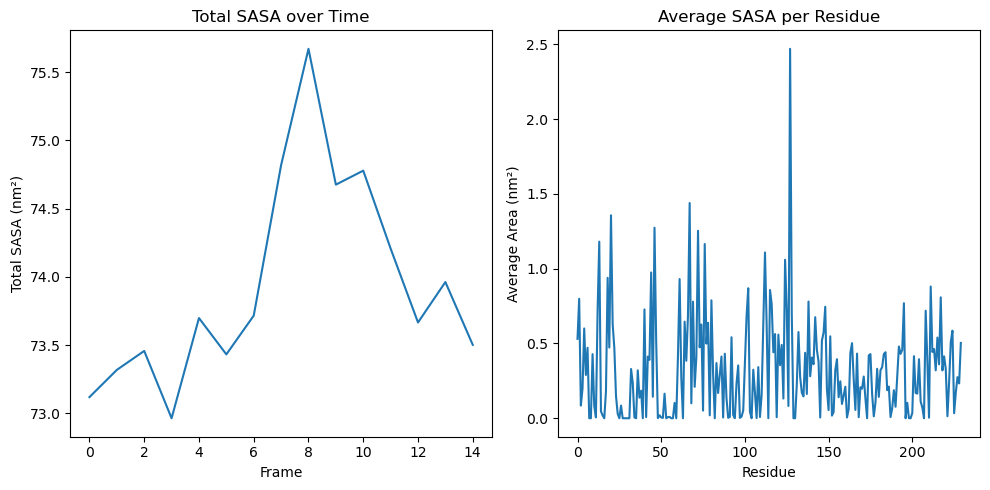

In [10]:
# make sure sasa plot was generated (sim1)
from IPython.display import Image
Image(filename=registry_1.get_mapped_path('fig0_110051'))

In [11]:
# make sure trajectory and topology exist (sim2)
traj_path_1_2 = registry_1.get_mapped_path("rec0_110056")
top_path_1_2 = registry_1.get_mapped_path("top_sim0_110055")

assert os.path.exists(traj_path_1_2)
assert os.path.exists(top_path_1_2)

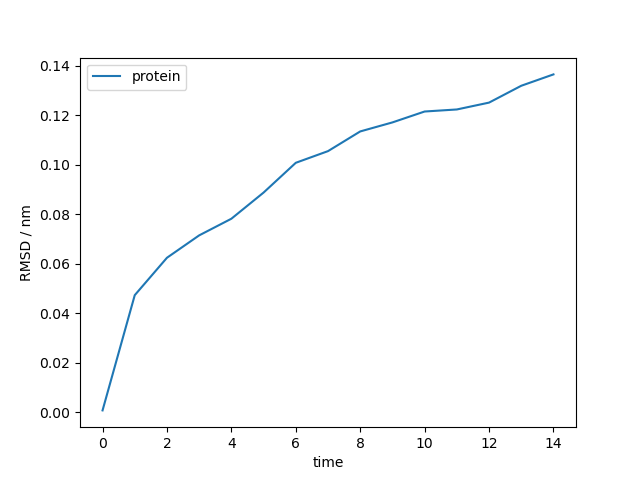

In [12]:
# make sure rmsd plot was generated (sim2)
from IPython.display import Image
Image(filename=registry_1.get_mapped_path('fig0_110105'))

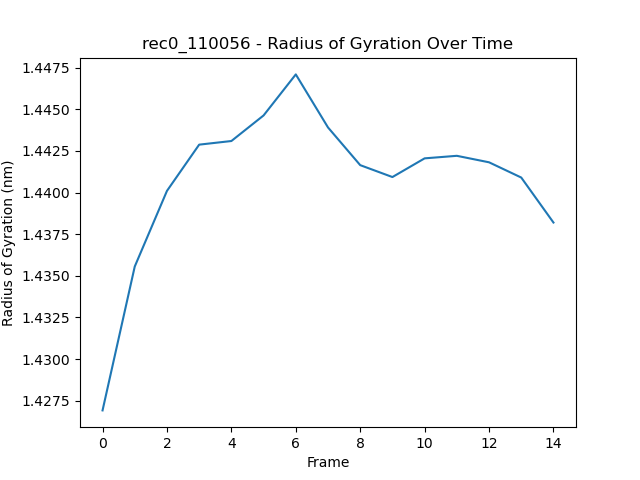

In [13]:
# make sure rgy plot was generated (sim2)
from IPython.display import Image
Image(filename=registry_1.get_mapped_path('fig0_110109'))

In [16]:
agent_2 = MDAgent(agent_type="Structured", model=llm_model, top_k_tools=tools, use_memory=False)
agent_2.run(prompt_10_natural)

Thought: First, I need to download the PDB file for 1LYZ. Then, I can simulate it at 300K and 400K, and compute the secondary structure assignments, RMSD, radius of gyration, and SASA.

Action:
```
{
  "action": "PDBFileDownloader",
  "action_input": "1LYZ"
}
```
PDB file found with this ID: 1LYZ
Now that I have the PDB file, I can simulate it at 300K and 400K. I will use the SetUpandRunFunction tool to set up and run the simulations.

Action:
```
{
  "action": "SetUpandRunFunction",
  "action_input": {
    "pdb_id": "1LYZ_110116",
    "forcefield_files": ["amber99sbildn.xml"],
    "save": true,
    "system_params": {
      "nonbondedMethod": "NoCutoff",
      "constraints": "None",
      "rigidWater": false
    },
    "integrator_params": {
      "integrator_type": "LangevinMiddle",
      "Temperature": "300 * kelvin",
      "Friction": "1.0 / picoseconds",
      "Timestep": "0.002 * picoseconds",
      "Pressure": "1.0 * bar"
    },
    "simulation_params": {
      "Ensemble": "NVT",

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

<Figure size 640x480 with 0 Axes>

In [27]:
registry_2 = agent_2.path_registry
print(registry_2.list_path_names_and_descriptions().replace(",", "\n"))

Files found in registry: 1LYZ_110116: PDB file downloaded from RSCB
 PDBFile ID: 1LYZ_110116
 1LYZ_110125: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_110129: Initial positions for simulation sim0_110129
 sim0_110129: Basic Simulation of Protein 1LYZ_110125
 rec0_110129: Simulation trajectory for protein 1LYZ_110125 and simulation sim0_110129
 rec1_110129: Simulation state log for protein 1LYZ_110125 and simulation sim0_110129
 rec2_110129: Simulation pdb frames for protein 1LYZ_110125 and simulation sim0_110129
 rec0_112710: dssp values for trajectory with id: rec0_110129
 rmsd_1LYZ: RMSD for 1LYZ
 fig0_112714: RMSD plot for 1LYZ
 rgy_rec0_110129: Radii of gyration per frame for rec0_110129
 fig0_112718: Plot of radii of gyration over time for rec0_110129
 sasa_1LYZ: Total SASA values for 1LYZ
 fig0_112724: Plot of SASA over time for 1LYZ
 top_sim0_112

In [14]:
agent_2 = MDAgent(ckpt_dir="ckpt_132")
registry_2 = agent_2.path_registry

In [28]:
# make sure pdb was downloaded
assert os.path.exists(registry_2.get_mapped_path("1LYZ_110116"))

In [29]:
# make sure dssp was computed correctly
from mdagent.tools.base_tools import ComputeDSSP

dssp = ComputeDSSP(registry_2)
dssp._run(traj_file= "1LYZ_110116", target_frames="first")

"{'residues in helix': 50, 'residues in strand': 14, 'residues in coil': 65, 'residues not assigned, not a protein residue': 101}"

In [ ]:
# # make sure the sites were found
# from mdagent.tools.base_tools import GetAllKnownSites

# get_all_known_sites = GetAllKnownSites()
# get_all_known_sites._run(query="1LYZ", primary_accession="")

In [30]:
# make sure trajectory and topology exist (sim1)
traj_path_2_1 = registry_2.get_mapped_path("rec0_110129")
top_path_2_1 = registry_2.get_mapped_path("top_sim0_110129")

assert os.path.exists(traj_path_2_1)
assert os.path.exists(top_path_2_1)

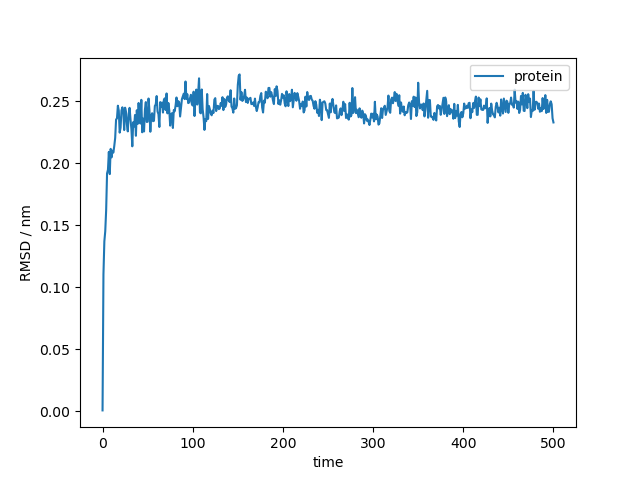

In [16]:
# make sure rmsd plot was generated (sim1)
from IPython.display import Image
Image(filename=registry_2.get_mapped_path('fig0_112714'))

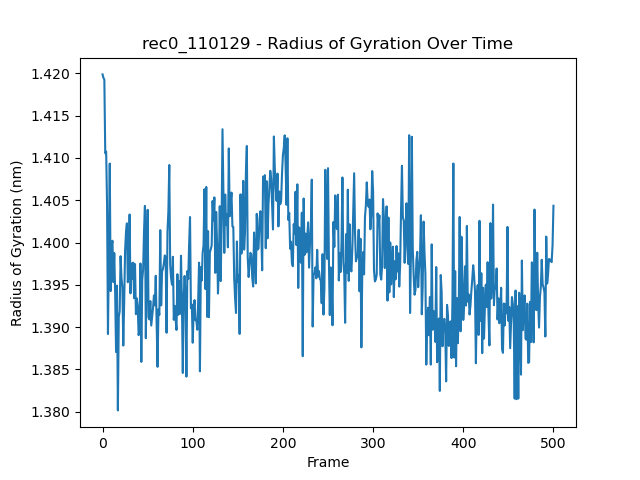

In [18]:
# make sure rgy plot was generated (sim1)
from IPython.display import Image
Image(filename=registry_2.get_mapped_path('fig0_112718'))

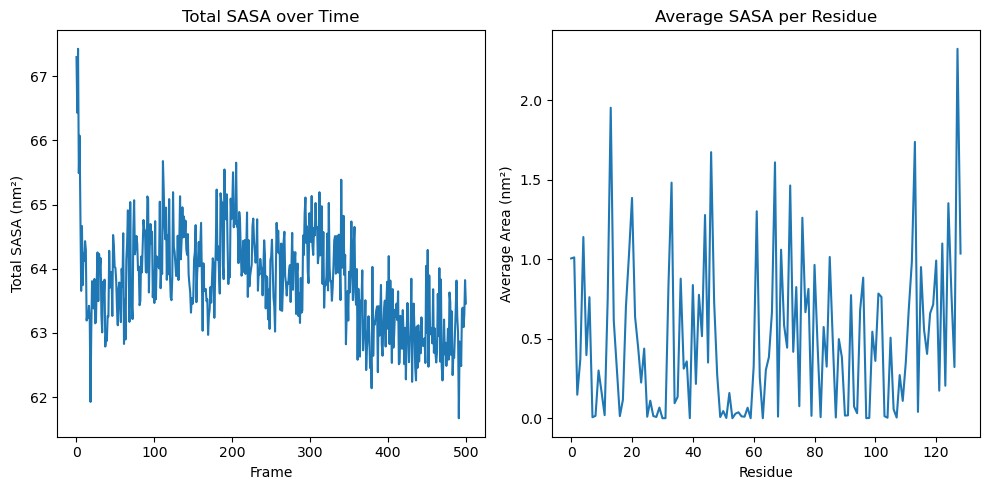

In [19]:
# make sure sasa plot was generated (sim1)
from IPython.display import Image
Image(filename=registry_2.get_mapped_path('fig0_112724'))

In [20]:
# make sure trajectory and topology exist (sim1)
traj_path_2_2 = registry_2.get_mapped_path("rec0_112729")
top_path_2_2 = registry_2.get_mapped_path("top_sim0_112729")

assert os.path.exists(traj_path_2_2)
assert os.path.exists(top_path_2_2)

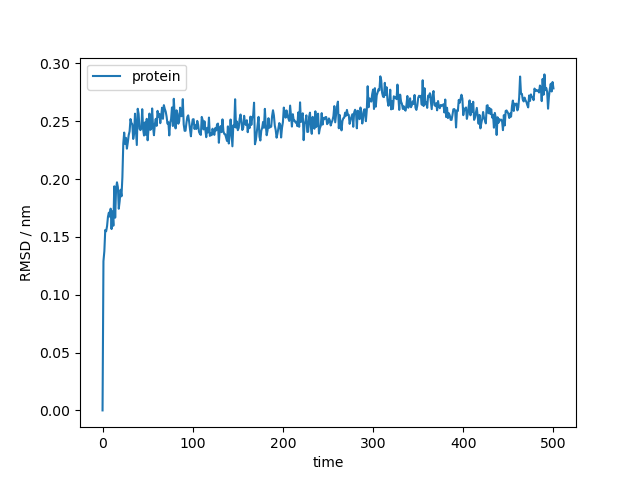

In [21]:
# make sure rmsd plot was generated (sim2)
from IPython.display import Image
Image(filename=registry_2.get_mapped_path('fig0_115328'))

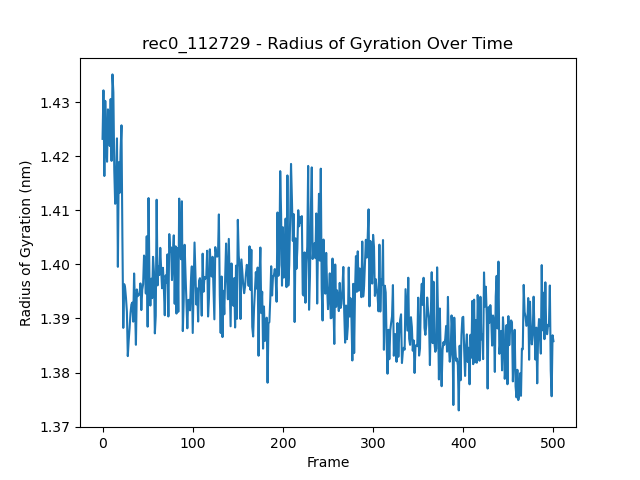

In [22]:
# make sure rgy plot was generated (sim2)
from IPython.display import Image
Image(filename=registry_2.get_mapped_path('fig0_115331'))